In [5]:
import pandas as pd

output = pd.read_csv("output/output-20240122-152625.csv")

In [19]:
# Want set of lengths of each column
output

,receptor_number,CDR3a,CDR3b,peptide,score,rank,binder
0,0,CAGASGNTGKLIF,CASSIRASYEQYF,GILGFVFTL,-0.000298,2167,1
1,1,CAGSGGGSQGNLIF,CASSIRSTDTQYF,GILGFVFTL,-0.000273,2178,1
2,2,CALDMGGGSQGNLIF,CASSIRAADTQYF,GILGFVFTL,-0.000089,2270,1
3,3,CAGGGSQGNLIF,CASSIRSSYEQYF,GILGFVFTL,-0.000869,2082,1
4,4,CALSGETSGSRLTF,CASGLVPGGLVYEQYF,GILGFVFTL,-0.194064,1899,1
...,...,...,...,...,...,...,...
6141,2,CVVADSKLTF,CSVTGERGTDTQYF,YGFQPTNGV,-20.276680,2,0
6142,3,CLVPSEQAGTALIF,CSASSTHSNQPQHF,YGFQPTNGV,-20.333136,1,0
6143,4,CAESKRDGGATNKLIF,CASSPSREGYTF,YGFQPTNGV,-12.833920,5,0
6144,5,CAVDTNTDKLIF,CASSQGYEQYF,YGFQPTNGV,-14.809388,4,0


In [20]:
def get_lengths_of_sequence_type(column_name):
    return output[column_name].apply(lambda x : len(x)).drop_duplicates()

In [21]:
def get_character_set(column_name):
    character_dict = {}

    output[column_name].apply(lambda x : add_chars_to_dict(x, character_dict)).drop_duplicates()

    return character_dict

def add_chars_to_dict(string, dict):
    for c in string:
        if c in dict.keys():
            dict[c] += 1
        else:
            dict[c] = 1 

In [22]:
charset = list(get_character_set("peptide").keys())
charset.sort()
charset

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

The characters are everything bar $B, J, O, U, X, Z$, which agrees with online!

In [23]:
types = ["peptide", "CDR3a", "CDR3b"]
for type in types:
    print(get_lengths_of_sequence_type(type))

0        9
2821    10
Name: peptide, dtype: int64
0       13
1       14
2       15
3       12
6       16
7       17
16      11
57      18
63      19
64       9
67      10
324      8
1131    20
Name: CDR3a, dtype: int64
0      13
4      16
17     15
22     14
23     18
42     12
67     17
76     11
160    10
450    19
716     8
861    20
Name: CDR3b, dtype: int64


So then:

peptide has length $9< l < 10$

CDR3a has length $9< l < 20$

CDR3b has length $8< l < 20$

Plotting the distribution of the scores

(array([   4.,    6.,   20.,   36.,   61.,   62.,  150.,  817., 2257.,
        2733.]),
 array([-7.90280609e+01, -7.11252565e+01, -6.32224522e+01, -5.53196478e+01,
        -4.74168434e+01, -3.95140390e+01, -3.16112347e+01, -2.37084303e+01,
        -1.58056259e+01, -7.90282154e+00, -1.71660649e-05]),
 <BarContainer object of 10 artists>)

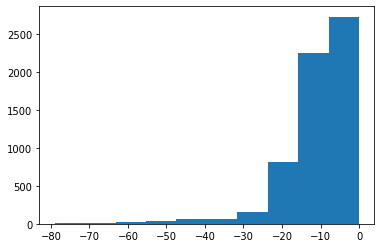

In [6]:
import matplotlib.pyplot as plt
scores = output["score"]
plt.hist(scores)

In [25]:
import numpy as np
print(np.mean(scores))
print(np.sqrt(np.var(scores)))

-10.264001308170382
9.140968186658725


(Something like a gamma distribution, or similar?)

(array([ 2.,  4.,  1.,  9.,  2., 17., 19., 10., 32., 52.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

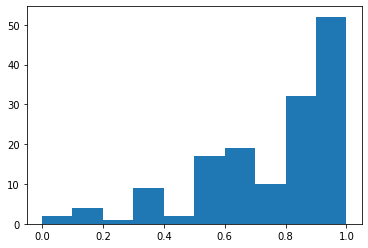

In [26]:
output_aucs = pd.read_csv("output/output_auc-20240122-152625.csv")

aucs = output_aucs["auc"]
plt.hist(aucs)

In [27]:
print(np.mean(aucs)) # Not quite the same as taking _all_ the aucs, weighted by the number in each class?
print(np.median(aucs))
print(len(aucs))

0.7601252158098623
0.8333333333333334
148


In [28]:
aucs

0      0.946921
1      0.881369
2      0.848989
3      0.880368
4      0.375000
         ...   
143    0.666667
144    1.000000
145    1.000000
146    0.333333
147    1.000000
Name: auc, Length: 148, dtype: float64

In [29]:
trimmed_output_aucs = output_aucs.loc[output_aucs['auc'] != 1].loc[output_aucs['auc'] != 0]
trimmed_aucs = trimmed_output_aucs['auc']

Situations where you only have one TCR you're checking against.

In [30]:
print(np.mean(trimmed_aucs)) # Not quite the same as taking _all_ the aucs, weighted by the number in each class?
print(np.median(trimmed_aucs))
print(len(trimmed_aucs))

0.6617503131358786
0.6666666666666667
102


In [31]:
# Let us shuffle our data, by shuffling one of the columns
unmodified_data =pd.read_csv("data/VDJ_test_2.csv")

In [32]:
unmodified_data['CDR3a'] = unmodified_data['CDR3a'].sample(frac=1).values

In [33]:
unmodified_data.to_csv("data/VDJ_test_2_shuffled.csv")

(array([   4.,    6.,   20.,   36.,   61.,   62.,  150.,  817., 2257.,
        2733.]),
 array([-7.90280609e+01, -7.11252565e+01, -6.32224522e+01, -5.53196478e+01,
        -4.74168434e+01, -3.95140390e+01, -3.16112347e+01, -2.37084303e+01,
        -1.58056259e+01, -7.90282154e+00, -1.71660649e-05]),
 <BarContainer object of 10 artists>)

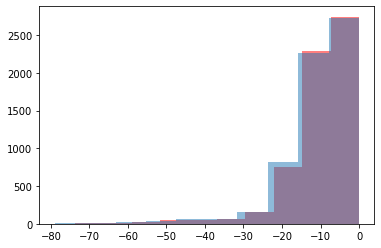

In [34]:
shuffled_output = pd.read_csv("output/output-20240128-233714_shuffled.csv")
shuffled_scores = shuffled_output["score"]
plt.hist(shuffled_scores, color="red", alpha=0.5)
plt.hist(scores, alpha=0.5)

In [35]:
binders = output[" binder"]

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(binders, scores)

0.7961846399717727

(array([   4.,    6.,   20.,   36.,   61.,   62.,  150.,  817., 2257.,
        2733.]),
 array([-7.90280609e+01, -7.11252565e+01, -6.32224522e+01, -5.53196478e+01,
        -4.74168434e+01, -3.95140390e+01, -3.16112347e+01, -2.37084303e+01,
        -1.58056259e+01, -7.90282154e+00, -1.71660649e-05]),
 <BarContainer object of 10 artists>)

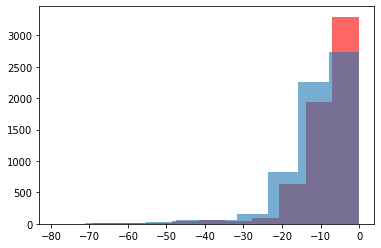

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

mis_output = pd.read_csv("output/output-20240208-213247_MIS.csv")
mis_scores = mis_output["score"]
plt.hist(mis_scores, color="red", alpha=0.6)
plt.hist(scores, alpha=0.6)